In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dmc_reblocked.csv')
data = df.to_numpy()
#df
#df.to_numpy()[:,0]#prints kinetic energy
E_exact = -2.1752243770341195

In [3]:
df

,Unnamed: 0,tau,eavg,err
0,0,0.0010,-2.167085,0.001204
1,1,0.0015,-2.169780,0.001178
2,2,0.0025,-2.364688,0.009966
3,3,0.0050,-2.173182,0.000377
4,4,0.0100,-2.406373,0.002618


In [4]:
tau = data[:, 1]
E_av = data[:, 2]
E_errbar = data[:, 3]

#Only take good values with acceptance good
E_av = E_av[0], E_av[1], E_av[3]
tau = tau[0], tau[1], tau[3]
E_errbar = E_errbar[0], E_errbar[1], E_errbar[3]


In [5]:
def func(x, a, b):
    return a * x + b

from scipy.optimize import curve_fit
# Perform curve fitting with weighted least squares
popt, pcov = curve_fit(func, tau, E_av, sigma=E_errbar, absolute_sigma=True)
xextr = np.linspace(0,0.01,10)

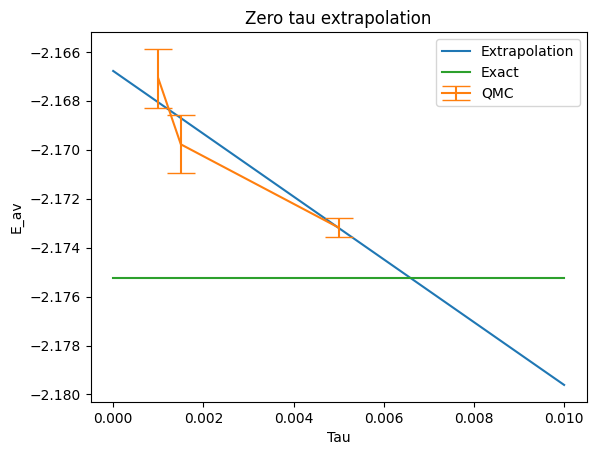

In [6]:
plt.xlabel('Tau')
plt.ylabel('E_av')
plt.title('Zero tau extrapolation')
plt.plot(xextr, func(xextr, popt[0], popt[1]), label = 'Extrapolation')
plt.errorbar(tau, E_av, yerr = E_errbar, capsize=10, label = 'QMC')
plt.plot([0,0.01], [E_exact, E_exact], label = 'Exact')
plt.legend()

In [7]:
E_0 = popt[1]
E_0_err = np.sqrt(pcov[1,1])
print('Ground state energy at tau=0 is E_0 = ',np.round(E_0,5), '±', np.round(E_0_err,5))

Ground state energy at tau=0 is E_0 =  -2.16678 ± 0.00113


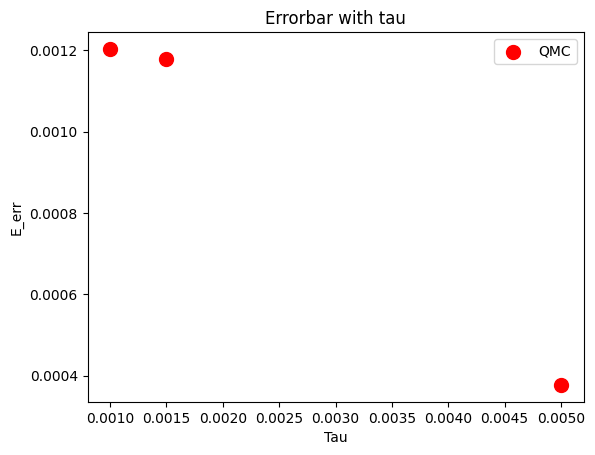

In [8]:
plt.xlabel('Tau')
plt.ylabel('E_err')
plt.title('Errorbar with tau')
plt.scatter(tau, E_errbar, label = 'QMC', c = 'red', s = 100)
plt.legend()